#  <i>Major Project - ML051B7</i>
### Problem Statement :
#### You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India
### Procedure/Steps  to follow :
- Importing the given train dataset
- Perform data cleaning such as removing all the null values and replacing it with mean/mode of the particular attribute
- Encoding the data into algorithm understandable format
- Training the data with perfect algorithm
- Importing the given test datase
- Apply the datacleaning and encoding techniques which are applied to train dataset
- Testing the dataset and predicting the output

#### Importing required packages 

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
%matplotlib inline

#### Reading Train Data

In [2]:
data = pd.read_excel('Data_Train (1).xlsx')
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


**As you can see there are units like (km/kg,kmpl) ,CC,bhp in Mileage,Engine,Power columns respectively which are not needed at all so first we will remove them.**


**DATA CLEANING**

In [3]:
#for i in data.columns:
#    print(i,':',data[i].nunique())
#print('\n')
#print('Fuel Type :',data['Fuel_Type'].unique(),'\n')
#print('Transmission :',data['Transmission'].unique(),'\n')
#print('Year : ',np.sort(data['Year'].unique()),'\n')
#print('Location :',data['Location'].unique(),'\n')

In [4]:
#print('Seat types:',np.sort(data['Seats'].unique()) ) 
#data['Seats'].value_counts()

**1) Modifying Columns**

In [5]:
data['Mileage']=data.Mileage.str.replace('km/kg','').str.replace('kmpl','').astype(float)

data['Engine']=data.Engine.str.replace('CC','').astype(float)

data['Power']=data.Power.str.replace(' bhp','')

**2) Splitting Name column in CarName,CarBodyStyle,CarTrimLevel**

In [6]:
CarName=data.Name.str.split(' ').apply(lambda x : x[0])
CarBodyStyle=data.Name.str.split(' ').apply(lambda x :x[1])
CarTrimLevel=data.Name.str.split(' ').apply(lambda x : x[2:])


In [7]:
TrimLevel=[]
for trim in CarTrimLevel:
    trim=' '.join(word for word in trim)
    TrimLevel.append(trim)
CarName=pd.Series(CarName,name='CarName')
BodyStyle=pd.Series(CarBodyStyle,name='BodyStyle')
TrimLevel=pd.Series(TrimLevel,name='TrimLevel')
data=pd.concat([data,CarName,BodyStyle,TrimLevel],axis=1)
data.drop('Name',axis=1,inplace=True)
data.columns


Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'CarName',
       'BodyStyle', 'TrimLevel'],
      dtype='object')

In [8]:
#data['CarName'].nunique(),data['BodyStyle'].nunique(),data['TrimLevel'].nunique()

**3) Add price column at end**

In [9]:
t=data['Price']
data.drop('Price',axis=1,inplace=True)
data=pd.concat([data,t],axis=1)

**4) Checking for null values in the dataset.**

In [10]:
data.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
CarName               0
BodyStyle             0
TrimLevel             0
Price                 0
dtype: int64

#### 5)  Finding outliers(if any) and Fill null values with suitable values

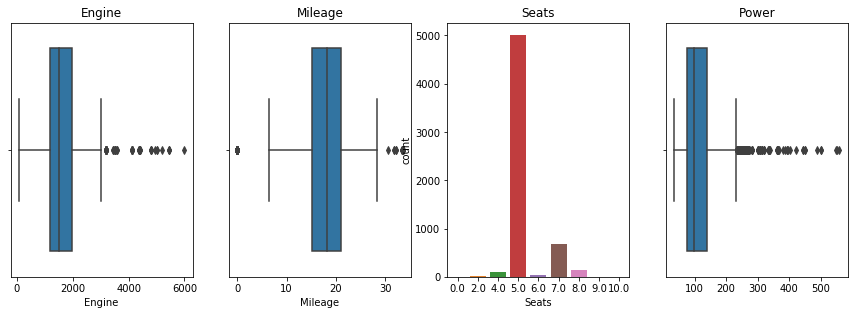

In [11]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(left = 0.125,bottom=0.1, right =0.9, top=0.9,wspace=0.2 ,hspace=0.2)

plt.subplot(341)
plt.title('Engine')
sns.boxplot('Engine',data=data)


plt.subplot(342)
plt.title('Mileage')
sns.boxplot('Mileage',data=data)


plt.subplot(343)
plt.title('Seats')
sns.countplot(data['Seats'])

#print(data[data['Power']=='null'])  # IF YOU WANT TO SEE WHAT I COMMENTED ABOUT POWER COLUMN ABOVE....
plt.subplot(344)
plt.title('Power')
data.loc[data['Power']=='null','Power']=np.nan  # filling string 'null' with np.nan(Null type)
power=data['Power'][data['Power'].isnull()==False].astype(float).values
sns.boxplot(power)

So there are null values in data . 
There is something that i found that in power column null values are more than 36 .Why ? because inplace of null values they have added the the string 'null bhp'. so that also need attention. 

**Comments:-**
- It is safe to fill null values of Seats with 5 .
- As there are outliers in Engine,Mileage and Power that are far from mean so It is better to fill their null value with mode.

Since  measure of central tendencies Mean and Median are closer to each other and so I think It is safe to fill null values with mean or median. I will fill null values with mean.

In [12]:
print('\n#---------------------Engine------------------------------------------------')
modeEngine=statistics.mode(data['Engine'])
data['Engine'].fillna(modeEngine,inplace=True)
print('Filling the Null Values of Engine with Mode :',modeEngine,'\n')

print('\n#-------------------Mileage------------------------------------------------')
modeMileage=statistics.mode(data['Mileage'].values)
data['Mileage'].fillna(modeMileage,inplace=True)
print('Filling the null values of Mileage with Mode :',modeMileage)

print('\n#------------------Seats---------------------------------------------------')
data.Seats.fillna(5,inplace=True)
print('Filling the Null values of Seats with Mode:',statistics.mode(data['Seats']))

print('\n#-------------------Power--------------------------------------------------')
modePower=statistics.mode(power)
data['Power'].fillna(modePower,inplace=True)
print('Filling Null Values with Mode : ',modePower)
data['Power']=data['Power'].astype(float)



#---------------------Engine------------------------------------------------
Filling the Null Values of Engine with Mode : 1197.0 


#-------------------Mileage------------------------------------------------
Filling the null values of Mileage with Mode : 17.0

#------------------Seats---------------------------------------------------
Filling the Null values of Seats with Mode: 5.0

#-------------------Power--------------------------------------------------
Filling Null Values with Mode :  74.0


In [13]:
data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
CarName              0
BodyStyle            0
TrimLevel            0
Price                0
dtype: int64

**Now No More Null Values ....**

### A LITTLE DATA VIZUALIZATIOIN 

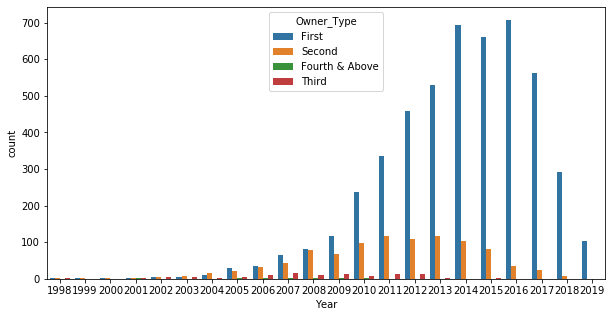

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data["Year"],hue=data['Owner_Type'])
plt.show()

- This Chart Shows Maximum no of Car are sold in year 2014. and almost every year First Owner Type car  were sold  most.

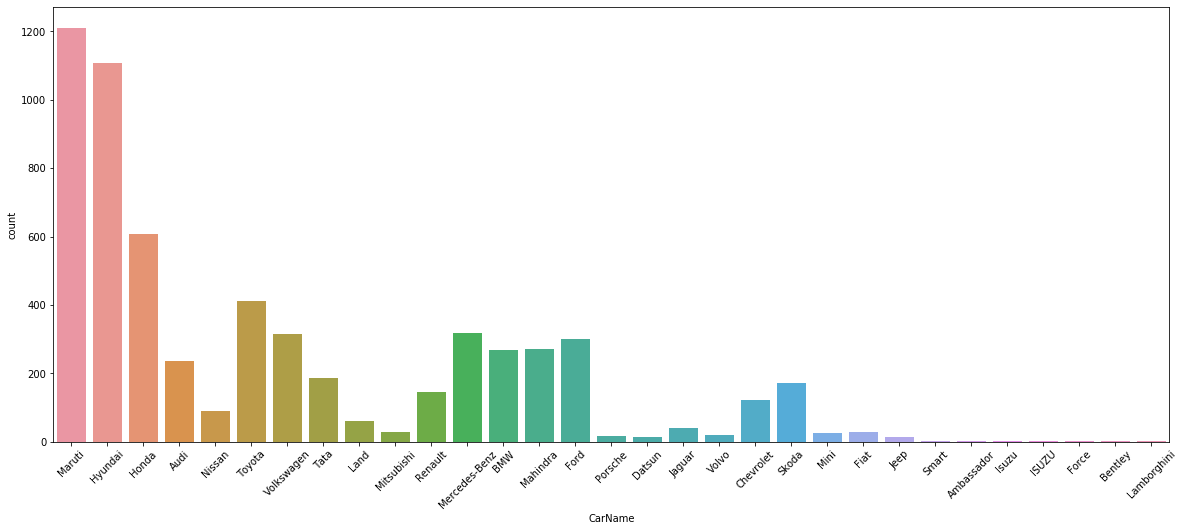

In [15]:
plt.figure(figsize=(20,8))
carplot=sns.countplot(data['CarName'])
carplot.set_xticklabels(carplot.get_xticklabels(), rotation=45)
plt.show()

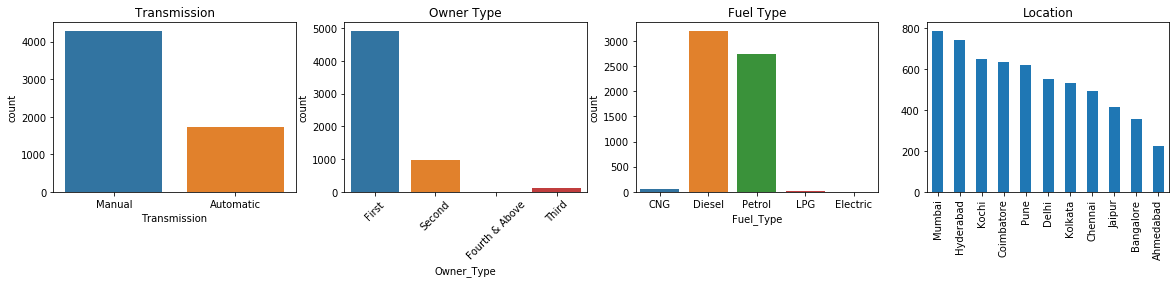

In [16]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left = 0.125,bottom=0.1, right =0.9, top=0.9,wspace=0.2 ,hspace=0.2)

plt.subplot(341)
plt.title("Transmission")
sns.countplot(data['Transmission'])

plt.subplot(342)
plt.title("Owner Type")
ownerplot=sns.countplot(data['Owner_Type'])
ownerplot.set_xticklabels(ownerplot.get_xticklabels(),rotation=45)

plt.subplot(343)
plt.title('Fuel Type')
sns.countplot(data['Fuel_Type'])

plt.subplot(344)
plt.title('Location')
data['Location'].value_counts().plot(kind='bar')


**Comments:-**
- Mumbai has maximum sell of cars.
- 71.4% of the cars are of Manual transmision and remaining(28.6%) are Automatic geared vehicles.
- 81.9% of First owner type are ready to sell their cars.
- 3000+ cars which are ready to sell are of Diesel fuel type.

#### 6) Doing Label Encoding on Fuel_Type,Transmission,Owner_Type

In [17]:
le=preprocessing.LabelEncoder()
data['Fuel_Type']=le.fit_transform(data['Fuel_Type'])
data['Owner_Type']=le.fit_transform(data['Owner_Type'])
data['Transmission']=le.fit_transform(data['Transmission'])

#Fuel Type : 0-->CNG  1-->Diesel 2-->Electric  3-->'LPG'  4-->Petrol
#Owner Type : 0-->'First', 1-->'Fourth & Above', 2-->'Second', 3-->'Third'
#Transmission : 0-->Automatic 1-->Manual

#### 7) Label Encoding on Location,CarName,CarBodyStyle,CarTrimLevel

In [18]:
#data['Location'].unique(),data['CarName'].unique(),data['BodyStyle'].unique(),data['TrimLevel'].unique()

In [19]:
data['Location']=le.fit_transform(data['Location'])
data['CarName']=le.fit_transform(data['CarName'])
data['BodyStyle']=le.fit_transform(data['BodyStyle'])
data['TrimLevel']=le.fit_transform(data['TrimLevel'])

In [20]:
data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
CarName              0
BodyStyle            0
TrimLevel            0
Price                0
dtype: int64

In [21]:
#This is how finally our training data looks like ....
data

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CarName,BodyStyle,TrimLevel,Price
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,18,189,1216,1.75
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,10,53,223,12.50
2,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,9,99,1452,4.50
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,18,69,1478,6.00
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,1,10,1162,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,18,169,1478,4.75
6015,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,10,202,16,4.00
6016,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,17,204,854,2.90
6017,8,2013,46000,4,1,0,18.90,998.0,67.10,5.0,18,189,1223,2.65


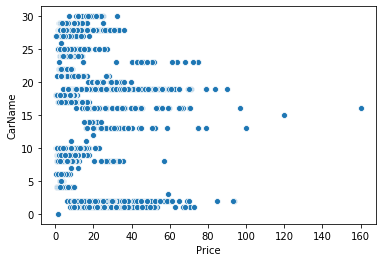

In [22]:
sns.scatterplot(data['Price'],data['CarName'])

In [23]:
#data.info()

# Import Various Models

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [25]:
#Performing Test_Train Split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Price', axis=1), data['Price'], test_size=0.20,random_state=79)

In [26]:
X=data.drop('Price',axis=1)
y=data['Price']

**1) Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
linear=LinearRegression().fit(X_train,y_train)

In [29]:
y_pred=linear.predict(X_test)
r2_score(y_test,y_pred)

0.7206236313446951

#### 2) K-Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsRegressor
model_1=KNeighborsRegressor()
parameters={
     'n_neighbors':np.arange(1,20)
}
knn_grid=GridSearchCV(estimator=model_1,param_grid=parameters,cv=5)
knn_grid.fit(X_train,y_train)
print(knn_grid.best_params_)
y_pred=knn_grid.predict(X_test)
print('R2_SCORE :',r2_score(y_test,y_pred))
print('Mean Square Error :',mean_squared_error(y_test,y_pred))
knn_grid.best_estimator_

{'n_neighbors': 5}
R2_SCORE : 0.49695076964680895
Mean Square Error : 54.75055729568106


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

#### 3) XGBoost

In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb_reg=XGBRegressor()
xgb_reg.fit(X_train,y_train)  #without hyperparameter tuning
parameters={
    # Parameters that we are going to tune.
    'max_depth':[5,7,9],
    'min_child_weight':[1,3,5],
    'eta':np.arange(0.01,0.1,0.02),
    'subsample':[0.5,0.8,1],
    'colsample_bytree':[0.5,0.8,1]
}
xgb=GridSearchCV(estimator=xgb_reg,param_grid=parameters,cv=5,n_jobs=-1) #hyperparameter tuning
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
r2_score(pred,y_test)

0.9433522134458624

In [32]:
print('BEST PARAMETERS AFTER HYPERPARAMETER TUNING :\n ')
pprint(xgb.best_params_)

BEST PARAMETERS AFTER HYPERPARAMETER TUNING :
 
{'colsample_bytree': 1,
 'eta': 0.01,
 'max_depth': 5,
 'min_child_weight': 5,
 'subsample': 1}


In [33]:
y_pred=xgb_reg.predict(X_test)
print('R2_SCORE (without hyperparameter tuning):',r2_score(y_test,y_pred))
print('Mean Square Error :',mean_squared_error(y_test,y_pred))
y_pred2=xgb.predict(X_test)
print('\n')
print('R2_SCORE (after hyperparameter tuning):',r2_score(y_test,y_pred2))
print('Mean Square Error :',mean_squared_error(y_test,y_pred2))

R2_SCORE (without hyperparameter tuning): 0.9452278789362064
Mean Square Error : 5.961253832758568


R2_SCORE (after hyperparameter tuning): 0.94685426865092
Mean Square Error : 5.784241846877957


In [34]:
# Xcross = data.drop('Price', axis=1)
# Ycross = data['Price']

# print(Xcross)

In [35]:
# # k-fold cross validation evaluation of xgboost model
# from numpy import loadtxt
# import xgboost
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# # load data




# xgb_reg=XGBRegressor()
# xgb_reg.fit(X_train,y_train)  #without hyperparameter tuning
# parameters={
#     # Parameters that we are going to tune.
#     'max_depth':[5,7,9],
#     'min_child_weight':[1,3,5],
#     'eta':np.arange(0.01,0.1,0.02),
#     'subsample':[0.5,0.8,1],
#     'colsample_bytree':[0.5,0.8,1]
# }
# xgb=GridSearchCV(estimator=xgb_reg,param_grid=parameters,cv=5,n_jobs=-1) #hyperparameter tuning



# kfold = KFold(n_splits=10, random_state=7)
# results = cross_val_score(xgb, Xcross, Ycross, cv=kfold)
# print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### Showing Relative importance of various columns :

R2_SCORE : 0.9530682988164901
Mean Square Error : 5.107923120819545


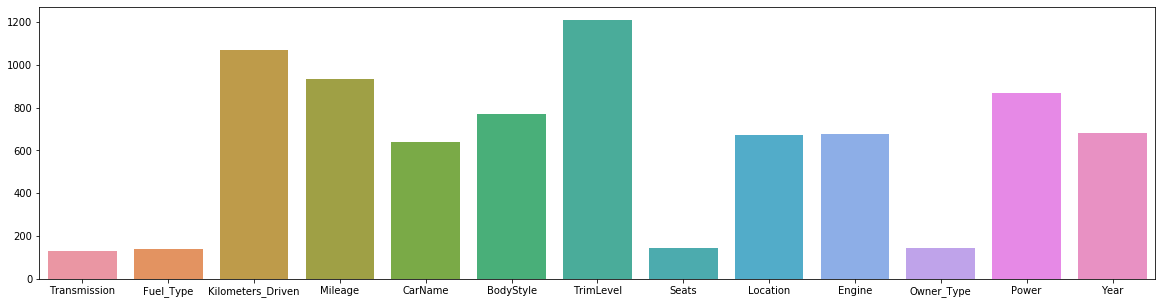

In [36]:
#These Hyperparameter I obtain when I run the above code sometime before
from xgboost import XGBRegressor
xgboost=XGBRegressor(colsample_bytree= 0.5,
                     eta= 0.08999999999999998,
                     max_depth= 9,
                     min_child_weight= 5,
                     subsample= 0.5)
xgboost.fit(X_train,y_train)
print('R2_SCORE :',r2_score(y_test,xgboost.predict(X_test)))
print('Mean Square Error :',mean_squared_error(y_test,xgboost.predict(X_test)))

most_relevant_features= list( dict((k, v) for k, v in xgboost.get_booster().get_fscore().items() if v >= 20).keys())
feature_values=list(dict((k,v) for k,v in xgboost.get_booster().get_fscore().items() if v>=20).values())

plt.figure(figsize=(20,5))
import seaborn as sns
sns.barplot(y=feature_values,x=most_relevant_features)

#### 4) RandomForest

In [37]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [38]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('R2_SCORE (without hyperparameter tuning):',r2_score(y_test,y_pred))
print('Mean Square Error :',mean_squared_error(y_test,y_pred))
y_pred2=rf_random.predict(X_test)
print('\n')
print('R2_SCORE (after hyperparameter tuning):',r2_score(y_test,y_pred2))
print('Mean Square Error :',mean_squared_error(y_test,y_pred2))

R2_SCORE (without hyperparameter tuning): 0.9369962130742272
Mean Square Error : 6.857166729988861


R2_SCORE (after hyperparameter tuning): 0.9429134059221231
Mean Square Error : 6.213154998133393


**So We Can see that XGBoost Perfomed well among all other with Max R2_Score and least mean square error.Hence we will use this to predict the Price of Cars in Test Dataset .**

### Now we will read the Test DataSet and Perform data cleaning as we did for Train Dataset

In [39]:
test=pd.read_excel('Data_Test (1).xlsx')
test.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [40]:
test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [41]:
test['Mileage']=test.Mileage.str.replace('km/kg','').str.replace('kmpl','').astype(float)

test['Engine']=test.Engine.str.replace('CC','').astype(float)

test['Power']=test.Power.str.replace(' bhp','')

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
CarName               0
BodyStyle             0
TrimLevel             0
dtype: int64
Mode Engine: 1197.0
Filling the Null Values of Engine with Mode : 1197.0 

Mode Mileage: 17.0 

Filling the null values of Mileage with Mode : 17.0
Filling the Null values of Seats with Mode: 5.0
Filling Null Values of Power with Mode :  74.0


Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
CarName              0
BodyStyle            0
TrimLevel            0
dtype: int64

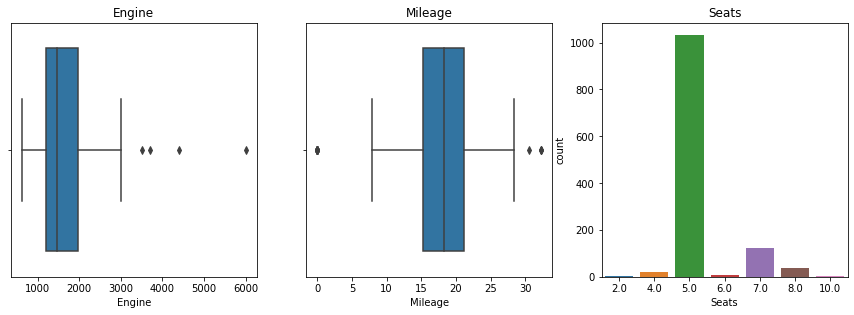

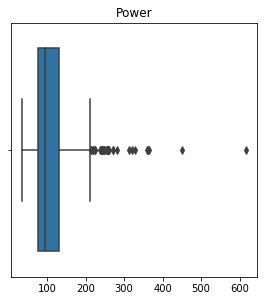

In [42]:
#Splitting Name column in CarName,CarBodyStyle,CarTrimLevel

CarName=test.Name.str.split(' ').apply(lambda x : x[0])
CarBodyStyle=test.Name.str.split(' ').apply(lambda x :x[1])
CarTrimLevel=test.Name.str.split(' ').apply(lambda x : x[2:])


TrimLevel=[]
for trim in CarTrimLevel:
    trim=' '.join(word for word in trim)
    TrimLevel.append(trim)
CarName=pd.Series(CarName,name='CarName')
BodyStyle=pd.Series(CarBodyStyle,name='BodyStyle')
TrimLevel=pd.Series(TrimLevel,name='TrimLevel')
test=pd.concat([test,CarName,BodyStyle,TrimLevel],axis=1)
test.drop('Name',axis=1,inplace=True)
test.columns


test['BodyStyle'].nunique(),test['CarName'].nunique(),test['TrimLevel'].nunique()

print(test.isnull().sum())

#### Doing Label Encoding on Fuel_Type,Transmission,Owner_Type

le=preprocessing.LabelEncoder()
test['Fuel_Type']=le.fit_transform(test['Fuel_Type'])
test['Owner_Type']=le.fit_transform(test['Owner_Type'])
test['Transmission']=le.fit_transform(test['Transmission'])

#Fuel Type : 0-->CNG  1-->Diesel 2-->Electric  3-->'LPG'  4-->Petrol
#Owner Type : 0-->'First', 1-->'Fourth & Above', 2-->'Second', 3-->'Third'
#Transmission : 0-->Automatic 1-->Manual

#### Label Encoding on Location,CarName,CarBodyStyle,CarTrimLevel

#test['Location'].unique(),test['CarName'].unique(),test['BodyStyle'].unique(),test['TrimLevel'].unique()

test['Location']=le.fit_transform(test['Location'])
test['CarName']=le.fit_transform(test['CarName'])
test['BodyStyle']=le.fit_transform(test['BodyStyle'])
test['TrimLevel']=le.fit_transform(test['TrimLevel'])

test

#### Finding outliers(if any) and Fill null values with suitable values

plt.figure(figsize=(15,15))
plt.subplots_adjust(left = 0.125,bottom=0.1, right =0.9, top=0.9,wspace=0.2 ,hspace=0.2)

plt.subplot(331)
plt.title('Engine')
sns.boxplot('Engine',data=test)
modeEngine=statistics.mode(test['Engine'])
print('Mode Engine:',modeEngine)
test['Engine'].fillna(modeEngine,inplace=True)
print('Filling the Null Values of Engine with Mode :',modeEngine,'\n')

plt.subplot(332)
plt.title('Mileage')
sns.boxplot('Mileage',data=test)
modeMileage=statistics.mode(test['Mileage'].values)
print('Mode Mileage:',modeMileage,'\n')
test['Mileage'].fillna(modeMileage,inplace=True)
print('Filling the null values of Mileage with Mode :',modeMileage)

plt.subplot(333)
plt.title('Seats')
sns.countplot(test['Seats'])
test.Seats.fillna(5,inplace=True)
print('Filling the Null values of Seats with Mode:',statistics.mode(test['Seats']))

#print(test[test['Power']=='null'])
plt.figure(figsize=(15,15))
plt.subplots_adjust(left = 0.125,bottom=0.1, right =0.9, top=0.9,wspace=0.2 ,hspace=0.2)

plt.subplot(331)
plt.title('Power')
test.loc[test['Power']=='null','Power']=np.nan
power=test['Power'][test['Power'].isnull()==False].astype(float).values
modePower=statistics.mode(power)
sns.boxplot(power)
test['Power'].fillna(modePower,inplace=True)
print('Filling Null Values of Power with Mode : ',modePower)
test['Power']=test['Power'].astype(float)
test.isnull().sum()

#Now No More Null Values ....

**Predicting The Price column of TestData and Storing the Results**

In [43]:
# Create a Pandas dataframe from the data.

df = pd.DataFrame({'Data': [10, 20, 30, 20, 15, 30, 45]})
predicted_val_on_test = xgb.predict(test)
Outs = pd.Series(predicted_val_on_test,name='Price predicted')

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Predicted values of data test.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Outs.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

**We used xgboost model as it gave the best r2 score**

In [44]:
print(Outs)

0        4.420582
1        4.960382
2       18.433363
3        3.214911
4        3.968886
          ...    
1229     3.848814
1230     4.479559
1231     7.204621
1232     3.975095
1233    18.937511
Name: Price predicted, Length: 1234, dtype: float32


**Above was the output for data test file and it was saved in "Predicted values of data test.xlsx"**